# How NFL Team Unit Success Translates to Overall Team Success:

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

[ X ] YES - make available
[ ] NO - keep private


Video: https://drive.google.com/file/d/17xG2HyfeDpoD8yeY944zTenEdDl6sFXa/view?usp=sharing 

## Names
- Fernando Bracamonte
- Noah Strause
- Ryan Liao
- Tom Hocquet
- Diego Zavalza

## Research Question
Through this project, we want to explore how crucial or important an NFL team's offensive rating and defensive rating is, and how this impacts their winning chances. Since 1980, is regular season offensive or defensive success more indicative of team success via wins?


## Background & Prior Work
    
The National Football League, or NFL, is a professional American sports league that currently consists of 32 teams. The league was founded in Ohio during September of 1920 [1]. The NFL consists of a regular season and a postseason - also known as the playoffs. The NFL is divided into 2 conferences, the AFC (American Football Conference) and the NFC (National Football Conference). Each conference has a total of 16 teams - divided into 4 divisions - each one containing 4 teams. These divisions are grouped by cardinal directions - such as the NFC West, which contains the Seattle Seahawks, the Los Angeles Rams, the Arizona Cardinals, and the San Francisco 49ers.

Prior to 2021, every season since 1980 (the first year we pulled our data from), has had 16 game seasons. For each NFL team, the 16 game season consisted of 8 games played at a team’s home stadium - called a home game - and 8 games played at another team’s stadium - called an away game. Each team also gets one bye week - a random week where a team does not play an opponent and instead gets to rest. At the end of the season the total number of wins, losses and ties are tallied for each team, where the teams with the best record typically go on to compete in the playoffs. For the playoffs there are 7 spots (6 spots prior to 2020) per conference. This means that there are 14 total playoff spots between the two conferences. The winner of each division automatically qualifies for a playoff spot and their records are compared, with the team with the best record earning the #1 seed spot (and a bye week) and the team with the worst record getting the #4 seed spot. The last 3 playoff spots are determined by the top 3 records among the non-division winning teams, where the team with the best record earning the #5 seed and the team with the third best record achieving the #7 seed. The remaining 9 teams are eliminated from the playoffs and do not play until the following season. 
	
As of the 2021-2022 NFL season, the regular season for each NFL team now consists of 17 games, with each team getting 1 extra home/away game. Moreover, each team breaks down into 3 parts: offense, defense, and special teams. Thus, we wanted to learn which, if any, would be more crucial for a team to focus on to succeed in the playoffs. We believe that the results of the analysis could be beneficial for teams to focus on and improve on. This is because starting in 1992, each NFL team had a salary cap, which basically means that each NFL team could not spend more money than the salary cap on players. Therefore, teams have to make thoughtful decisions on which players to hire and which positions (offense, defense or special teams).

## References (include links):

1) "The Birth of the National Football League" https://www.history.com/news/the-birth-of-the-national-football-league

2) "DEFENSE OR OFFENSE? WHICH IS THE BETTER PREDICTOR OF SUCCESS FOR PROFESSIONAL FOOTBALL TEAMS?" https://journals.sagepub.com/doi/pdf/10.2466/pms.1999.89.1.151

3) "A Statistical Data Mining Approach to Determining the Factors that Distinguish Championship Caliber Teams in the National Football League" https://scholarworks.rit.edu/cgi/viewcontent.cgi?referer=https://scholar.google.com/&httpsredir=1&article=2749&context=article

4) “NFL Original towns” https://www.nfl.com/100/original-towns/#:~:text=In%201920%2C%20ten%20football%20teams,National%20Football%20League%20(NFL).

5) “NFL Regular Season Games Played per Season”, https://www.profootballhof.com/news/2005/01/news-nfl-regular-season-games-played-per-season/


## Hypothesis
We believe that having a better offensive rating in the NFL is more beneficial towards a team's playoff success having a better defensive rating.


## Dataset(s)

Our main and only dataset used for this project came from Pro Football Reference (https://www.pro-football-reference.com/). This is a website that contains all sorts of data and statistics for the NFL. We are primarily interested in three statistics: offensive simple rating system (offensive SRS), defensive simple rating system (defensive SRS), and win percentage of each NFL team. Simple rating system (SRS) is a more complex way that Pro Football Reference uses to grade offenses and defenses. Our data will therefore have around 1300 observations, which is the number of teams in the NFL (32 teams) times the number of seasons we are using (42 seasons, from 1980 to 2022). 

The method we used to obtain our data into a usable dataset was to use an API. The API that we used was the SportsReference NFL package (https://github.com/roclark/sportsipy). This package (version 0.6.0) can be used to retrieve information and statistics for the NFL, like player statistics, game scores, season stats, etc. Therefore, we only used this package to extract NFL teams defensive and offensive ratings, and win percentage of each NFL team per season. And, using this package, we can construct our dataframes through code rather than manipulating external dataframes. Therefore, we did not perform any combining of multiple dataframes since we can just determine the format of our dataframe through code before extracting the data.

To summarize our data:
Dataset Name: NFL Standings & Team Stats
Link to the dataset: https://www.pro-football-reference.com/years/ 
Number of observations: 1273


## Setup

In [1]:
pip install sportsipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sportsipy.nfl.teams import Teams
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

Extracting the data from the API:
- Create our own dataframe with the columns we need beforehand.
- Grab data from every year since 1980 using a for loop.
- Use a nested for loop to grab every individual team from that year.
- Concat all data back to the initial dataframe.

In [3]:
all_teams = pd.DataFrame(columns=['Year', 'Team_Name', 'Offensive_SRS', 'Defensive_SRS', 'Win_Percentage', 'Post_Season_Result'])

for season in range(1980, 2022):
    teams = Teams(year=season)
    for team in teams:
        dic = {'Year': [season], 'Team_Name': [team.name], 'Offensive_SRS': [team.offensive_simple_rating_system],
               'Defensive_SRS': [team.defensive_simple_rating_system], 'Win_Percentage': [team.win_percentage],
               'Post_Season_Result': [team.post_season_result]}
        temp = pd.DataFrame(dic)
        all_teams = pd.concat([all_teams, temp], ignore_index=True)

## Data Cleaning

- The data is already clean because we are extracting it from an API and forming our own dataframe. One issue we did encounter was some incorrect data from older data points. We made sure to keep an eye out and not include those in our dataframe.

- We got the data into a usable format by extracting the data from the API and adding it to the columns we wanted . Basically, we designed our dataframe in such a way that transformation or manipulation shouldn’t be needed after getting our data into a dataframe.

- We found that some data was incorrect (in the Postseason Result column of the dataframe). Thus, this column had to be manually checked for any other inconsistencies. Afterwards, we excluded some data that had erroneous data from our dataframe; most importantly the years 1993 and 2021, which had faulty data that insinuated that every team made the playoffs. We removed those years from the dataset.

In [4]:
all_teams = all_teams.sort_values(by='Win_Percentage', ascending=False, ignore_index=True)
all_teams['Post_Season_Result'] = all_teams['Post_Season_Result'].astype(str)

In [5]:
all_teams.head(20)

,Year,Team_Name,Offensive_SRS,Defensive_SRS,Win_Percentage,Post_Season_Result
0,2007,New England Patriots,15.9,4.2,1.000,Lost Super Bowl
1,1985,Chicago Bears,6.5,9.4,0.938,None
2,2015,Carolina Panthers,6.0,2.1,0.938,Lost Super Bowl
3,2011,Green Bay Packers,11.5,-0.1,0.938,Lost Divisional
4,1984,San Francisco 49ers,7.4,5.4,0.938,None
5,2004,Pittsburgh Steelers,3.4,5.6,0.938,Lost Conference Championship
6,1998,Minnesota Vikings,13.2,1.6,0.938,Lost Conference Championship
7,1982,Los Angeles Raiders,6.1,-0.9,0.889,Lost Divisional
8,1982,Washington Redskins,2.2,5.2,0.889,Won Super Bowl
9,1998,Atlanta Falcons,7.0,3.0,0.875,Lost Super Bowl


In [6]:
all_teams.describe()

,Offensive_SRS,Defensive_SRS,Win_Percentage
count,1273.000000,1273.000000,1273.000000
mean,0.000157,-0.001257,0.500218
std,4.145352,3.488102,0.189621
min,-12.300000,-12.000000,0.000000
25%,-2.900000,-2.400000,0.375000
50%,-0.100000,0.200000,0.500000
75%,2.700000,2.400000,0.625000
max,15.900000,9.800000,1.000000


In [7]:
playoff_teams = all_teams.loc[all_teams['Post_Season_Result'] != 'None']
playoff_teams = playoff_teams[(playoff_teams['Year'] != 1993) & (playoff_teams['Year'] != 2021)]
playoff_teams = playoff_teams.reset_index()

In [8]:
def standardize_playoffs(s):
    if s == 'Lost WC':
        out = 0
    elif s == 'Lost Divisional':
        out = 1
    elif s == 'Lost Conference Championship':
        out = 2
    elif s == 'Lost Super Bowl':
        out = 3
    elif s == 'Won Super Bowl':
        out = 4
    else:
        out = None
    return out

In [9]:
playoff_teams['Post_Season_Result'] = playoff_teams['Post_Season_Result'].apply(standardize_playoffs)
playoff_teams = playoff_teams.rename(columns={'Post_Season_Result': 'Post_Season_Wins'})

In [10]:
playoff_teams.head(20)

,index,Year,Team_Name,Offensive_SRS,Defensive_SRS,Win_Percentage,Post_Season_Wins
0,0,2007,New England Patriots,15.9,4.2,1.000,3
1,2,2015,Carolina Panthers,6.0,2.1,0.938,3
2,3,2011,Green Bay Packers,11.5,-0.1,0.938,1
3,5,2004,Pittsburgh Steelers,3.4,5.6,0.938,2
4,6,1998,Minnesota Vikings,13.2,1.6,0.938,2
5,7,1982,Los Angeles Raiders,6.1,-0.9,0.889,1
6,8,1982,Washington Redskins,2.2,5.2,0.889,4
7,9,1998,Atlanta Falcons,7.0,3.0,0.875,3
8,10,1984,Miami Dolphins,9.1,1.5,0.875,2
9,11,2016,New England Patriots,4.3,5.0,0.875,4


In [11]:
playoff_teams.describe()

,index,Offensive_SRS,Defensive_SRS,Win_Percentage,Post_Season_Wins
count,441.000000,441.000000,441.000000,441.000000,441.000000
mean,264.020408,2.839683,2.207483,0.685279,1.129252
std,173.103141,3.613238,2.874561,0.099659,1.200031
min,0.000000,-5.300000,-9.500000,0.438000,0.000000
25%,121.000000,0.400000,0.200000,0.625000,0.000000
50%,246.000000,2.600000,2.200000,0.688000,1.000000
75%,389.000000,4.900000,4.300000,0.750000,2.000000
max,762.000000,15.900000,9.800000,1.000000,4.000000


### Description of Dataframes & Column Names:

#### Dataframe: all_teams
- Includes data from all teams from 1980-2020, excluding 1993 because of missing data.

###### Columns:
- Year: Year in which that team played.
- Team_Name: Name of the team.
- Offensive_SRS: Offensive Simple Rating System.
- Defensive_SRS: Defensive Simple Rating System.
- Win_Percentage: The team's regular season win percentage that year.
- Post_Season_Result: The team's post-season result

#### Dataframe: playoff_teams
- Includes data from all teams that qualified for the post-seaon (playoffs), exlcuding teams from the year 1993.

###### Columns:
- Year: Year in which that team played.
- Team_Name: Name of the team.
- Offensive_SRS: Offensive Simple Rating System.
- Defensive_SRS: Defensive Simple Rating System.
- Win_Percentage: The team's regular season win percentage that year.
- Post_Season_Result: The number of wins that team had in the post-season, the maximum being 4.
    - Note that we are counting playoff bye weeks as a "free win". Having a playoff bye week means that a team's regular season result was good enough for them to skip a round of the playoffs without playing.

## Data Visualizations

The first two graphs plot every team's offensive/defensive rating against their win percentage. We added a linear regression line to further visualize any correlation. Both plots clearly show a positive correlation between a unit's rating and their team's win percentage. This makes sense, as having a better offensive/defense should give your team a better chance at winning games.

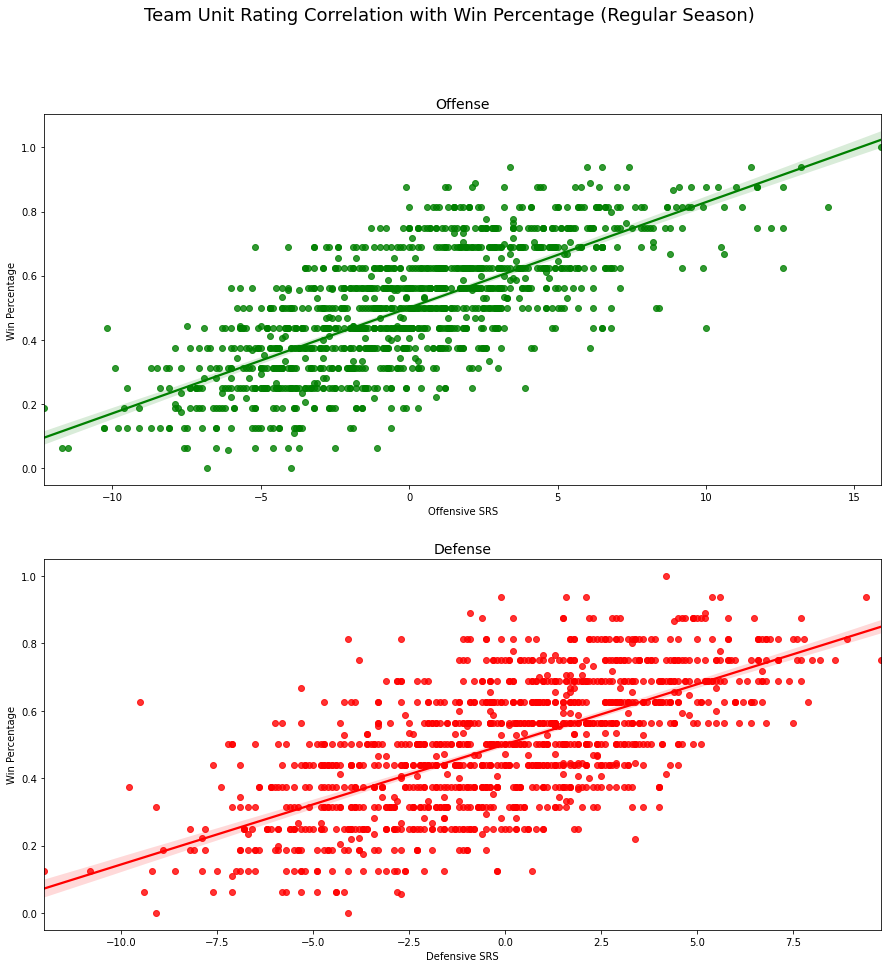

In [12]:
fig, ax = plt.pyplot.subplots(2,1, figsize=(15, 15))
fig.suptitle('Team Unit Rating Correlation with Win Percentage (Regular Season)', fontsize=18)
off_reg_c = sns.regplot(data=all_teams, x='Offensive_SRS', y = 'Win_Percentage', color = 'g', ax = ax[0])
off_reg_c.set(xlabel='Offensive SRS', ylabel='Win Percentage')
off_reg_c.set_title('Offense', fontsize = 14)
def_reg_c = sns.regplot(data=all_teams, x='Defensive_SRS', y = 'Win_Percentage', color = 'r', ax = ax[1])
def_reg_c.set(xlabel='Defensive SRS', ylabel='Win Percentage')
def_reg_c.set_title('Defense', fontsize = 14)
fig.show()

The following histograms display that the distributions of offensive/defensive rating as well as win percentage are roughly normal. The "typical" rating for offenses and defenses is 0, while the frequency of positive and negative ratings seems to be about equal. Similarly, teams seem to average a 0.5 win percentage with the frequency above and below that threshold being close.

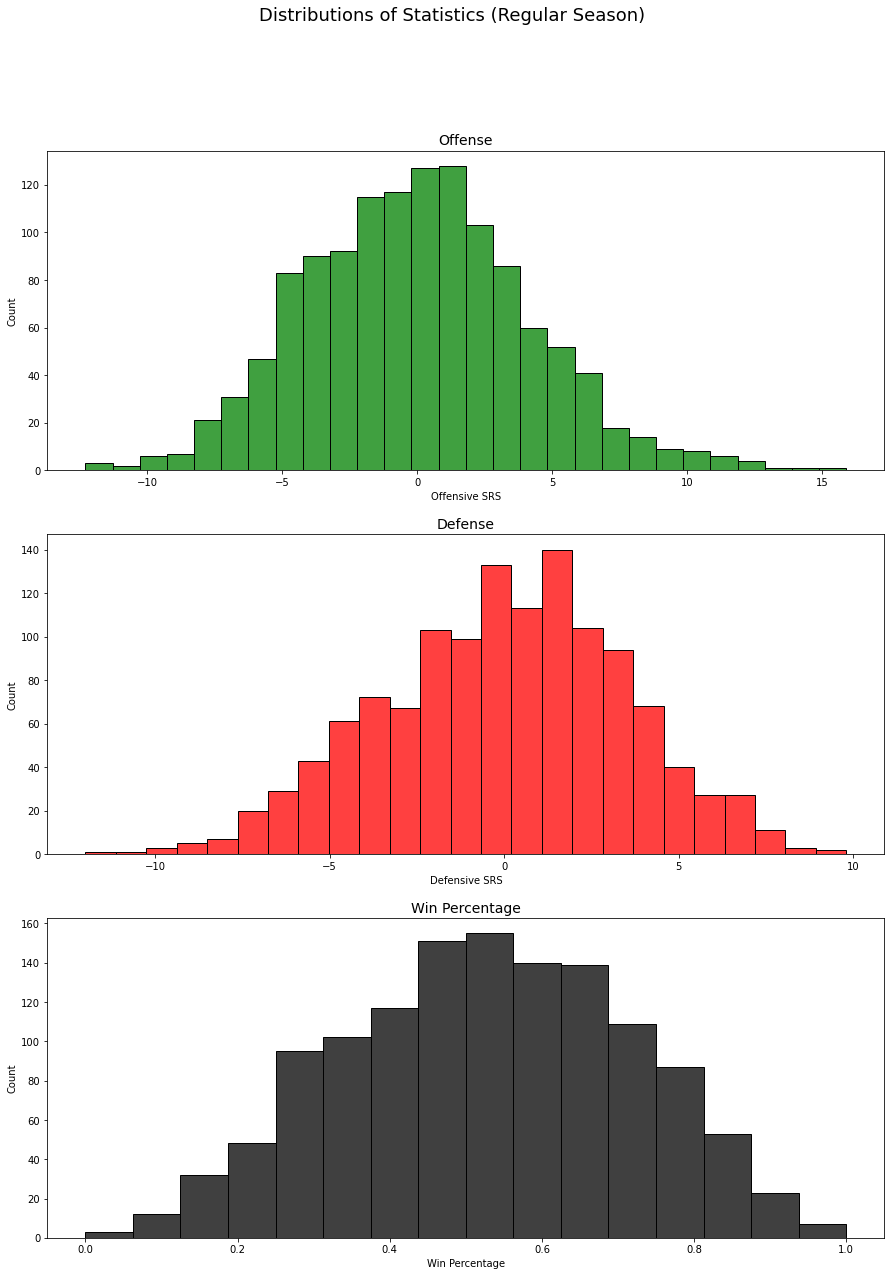

In [13]:
fig, ax = plt.pyplot.subplots(3,1, figsize=(15, 20))
fig.suptitle('Distributions of Statistics (Regular Season)', fontsize=18)
off_reg_d = sns.histplot(data=all_teams, x='Offensive_SRS', color = 'g', ax = ax[0])
off_reg_d.set(xlabel='Offensive SRS')
off_reg_d.set_title('Offense', fontsize = 14)
def_reg_d = sns.histplot(data=all_teams, x='Defensive_SRS', color = 'r', ax = ax[1])
def_reg_d.set(xlabel='Defensive SRS')
def_reg_d.set_title('Defense', fontsize = 14)
win_p_d = sns.histplot(data=all_teams, x='Win_Percentage', bins = 16, color = 'black', ax = ax[2])
win_p_d.set(xlabel='Win Percentage')
win_p_d.set_title('Win Percentage', fontsize = 14)
fig.show()

Narrowing down the dataframe to just teams that ended up qualifying for the postseason, we can see that the simple rating scores are still normal distributed. Once we get to the playoffs, though, our overall measure of success changes from regular season win percentage to postseason result.

Based on the following plots, it appears that the offensive/defensive ratings are still normally distributed. However, the data is skewed more towards the positive end. In other words, playoff teams are more likely to possess better team units than an average team that didn't qualify for the playoffs.

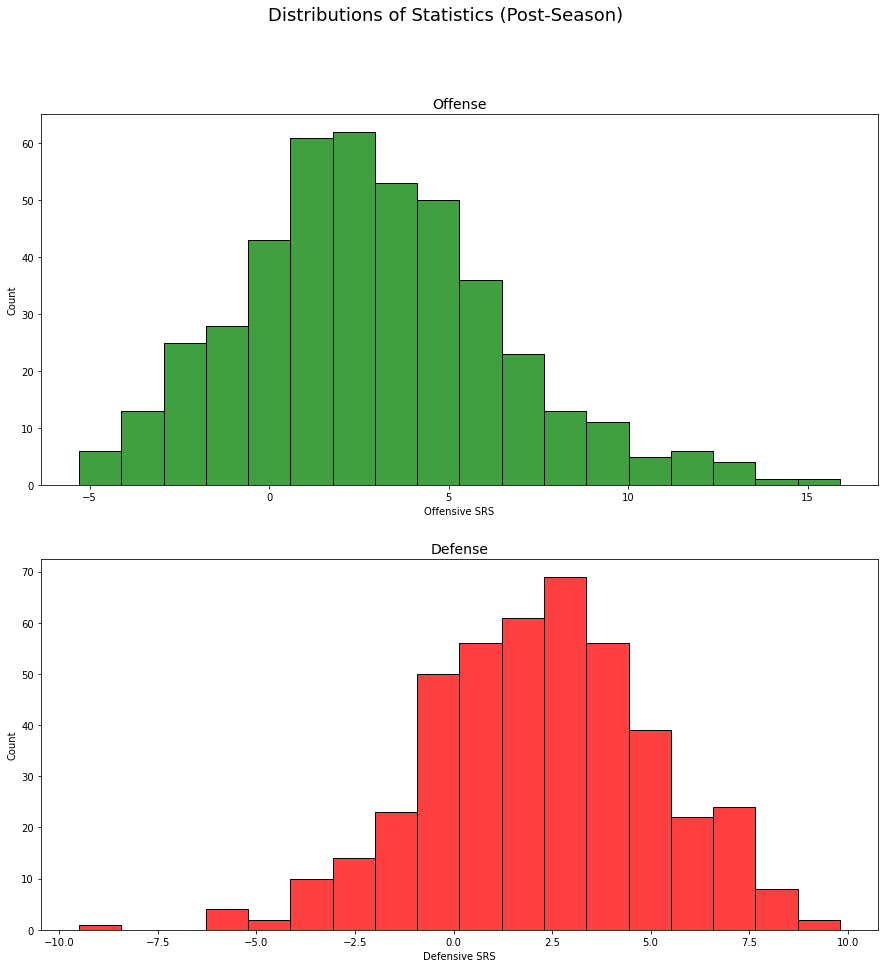

In [14]:
fig, ax = plt.pyplot.subplots(2,1, figsize=(15, 15))
fig.suptitle('Distributions of Statistics (Post-Season)', fontsize=18)
off_po_d = sns.histplot(data=playoff_teams, x='Offensive_SRS', color = 'g', ax = ax[0])
off_po_d.set(xlabel='Offensive SRS')
off_po_d.set_title('Offense', fontsize = 14)
def_po_d = sns.histplot(data=playoff_teams, x='Defensive_SRS', color = 'r', ax = ax[1])
def_po_d.set(xlabel='Defensive SRS')
def_po_d.set_title('Defense', fontsize = 14)
fig.show()

- The distribution of post-season wins, however, is not normally distributed, unlike regular season win percentage. 
- The NFL uses a seeding playoff structure, where generally, teams with higher regular season win percentages will obtain a higher playoff seeding. The highest seedings are given the privilege of a bye week, meaning they get to move onto the second round of the playoffs without playing an opponent. For the other teams, though, they all play each other in a single elimination bracket. This is why the most common result for playoff wins is 0. The most number of games are played in the first round, and the teams that move on from any given round are subsequently split into the higher bins.

Text(0.5, 1.0, 'Post-Season Wins Distribution')

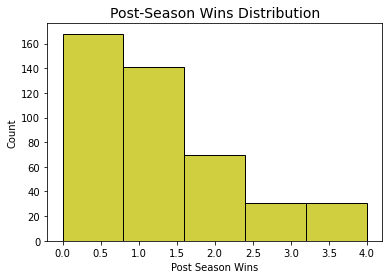

In [15]:
psw_d = sns.histplot(data=playoff_teams, x='Post_Season_Wins', bins=5, color = 'y')
psw_d.set(xlabel='Post Season Wins')
psw_d.set_title('Post-Season Wins Distribution', fontsize = 14)

The following plots display a team's offensive/defensive ratings against post-season wins. It would appear that the linear regression line is more positive for offensive rating than defensive rating, although the correlation is less clear than it is for the regular season. This is probably because in the playoffs, overall team strength should theoretically be far closer to each other. This is shown above by the lower range betwen the worst and best offensive and defensive ratings.

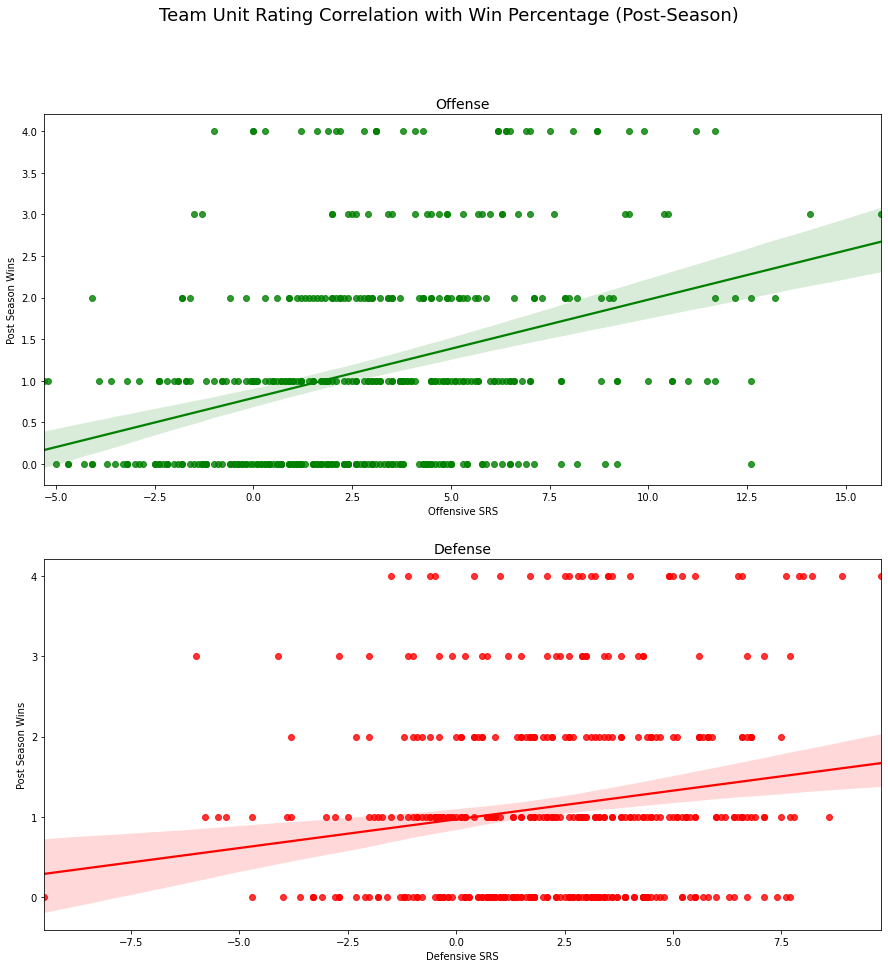

In [16]:
fig, ax = plt.pyplot.subplots(2,1, figsize=(15, 15))
fig.suptitle('Team Unit Rating Correlation with Win Percentage (Post-Season)', fontsize=18)
off_po_c = sns.regplot(data=playoff_teams, x='Offensive_SRS', y = 'Post_Season_Wins', color = 'g', ax = ax[0])
off_po_c.set(xlabel='Offensive SRS', ylabel='Post Season Wins')
off_po_c.set_title('Offense', fontsize = 14)
def_po_c = sns.regplot(data=playoff_teams, x='Defensive_SRS', y = 'Post_Season_Wins', color = 'r', ax = ax[1])
def_po_c.set(xlabel='Defensive SRS', ylabel='Post Season Wins')
def_po_c.set_title('Defense', fontsize = 14)
fig.show()

We used box plots as another way to visualize the trends shown above as well as finding any outliers. While offensive rating still shows a more positive correlation with wins, there are curiously more outliers of really good offensives having poor post-season showings.

Text(0.5, 1.0, 'Defense')

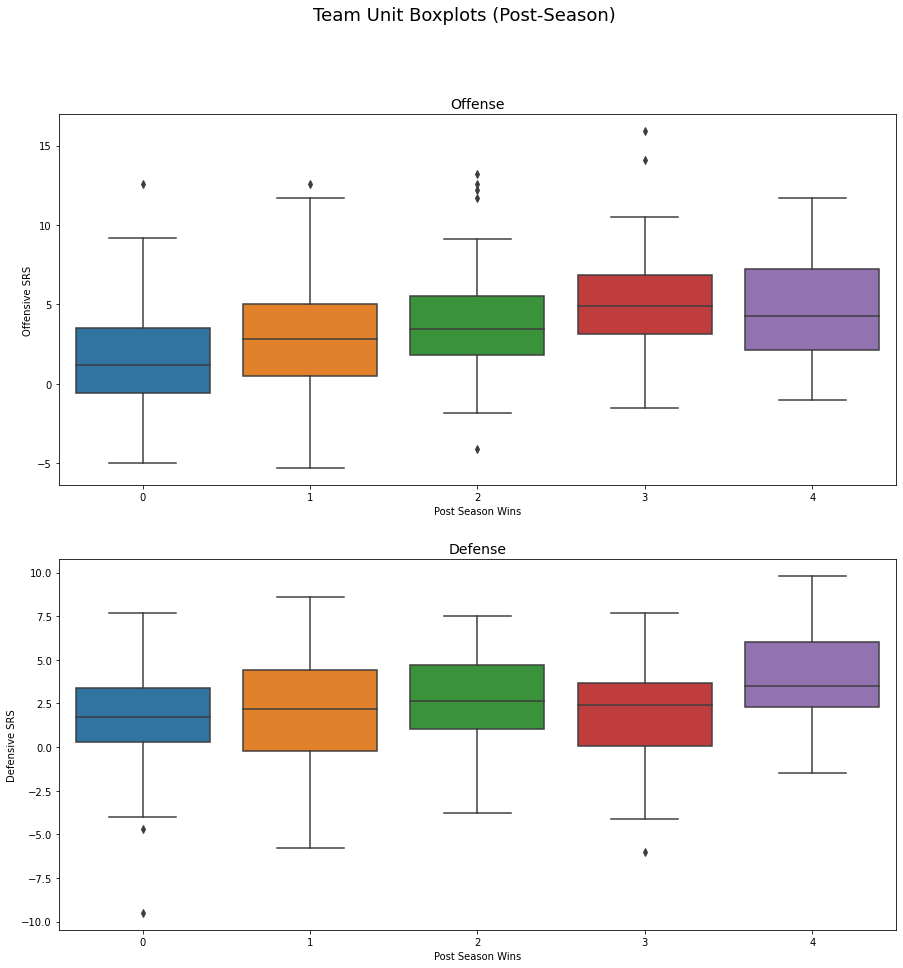

In [17]:
fig, ax = plt.pyplot.subplots(2,1, figsize=(15, 15))
fig.suptitle('Team Unit Boxplots (Post-Season)', fontsize=18)
off_po_bp = sns.boxplot(x='Post_Season_Wins', y = 'Offensive_SRS', data=playoff_teams, ax = ax[0])
off_po_bp.set(xlabel='Post Season Wins', ylabel='Offensive SRS')
off_po_bp.set_title('Offense', fontsize = 14)
def_po_bp = sns.boxplot(x='Post_Season_Wins', y = 'Defensive_SRS', data=playoff_teams, ax = ax[1])
def_po_bp.set(xlabel='Post Season Wins', ylabel='Defensive SRS')
def_po_bp.set_title('Defense', fontsize = 14)

These two regressions show that offensive SRS seems to be more predictive than defensive SRS in terms of playoff success. This is shown by the higher coefficient value for offensive SRS and that both p-values are very low, indicating that the data is significant.

In [18]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [19]:
outcome_1, predictors_1 = patsy.dmatrices('Post_Season_Wins ~ Offensive_SRS', playoff_teams)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Post_Season_Wins   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     63.61
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.33e-14
Time:                        14:29:31   Log-Likelihood:                -675.83
No. Observations:                 441   AIC:                             1356.
Df Residuals:                     439   BIC:                             1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7937      0.068     11.667

In [20]:
outcome_2, predictors_2 = patsy.dmatrices('Post_Season_Wins ~ Defensive_SRS', playoff_teams)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Post_Season_Wins   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     13.25
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           0.000305
Time:                        14:29:31   Log-Likelihood:                -699.11
No. Observations:                 441   AIC:                             1402.
Df Residuals:                     439   BIC:                             1410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9715      0.071     13.665

## Regression Model Results
- Offensive SRS coefficient: 0.1182
- Offensive SRS p-value: 0.000
- Defensive SRS coefficient: 0.0714 
- Defensive SRS p-value: 0.000

## Ethics & Privacy

Our datasets are based on publicly available NFL statistics therefore, we do not have to worry about bias that may come from personal surveys or privacy issues. Since all data was and can be viewed and obtained by anyone ethically, we don’t have to worry about any privacy issues or ethical concerns. In addition, there is no bias as all data is collected from previous NFL games therefore these are pure statistics based on games eliminating any possible bias. For example, we don’t have to worry about selection bias because we are using playoff results meaning there is no randomization and all teams earned their spot in the playoffs. In terms of who our project will impact, this will only give readers an insight as to any patterns we may find. Since the data is past data and simply game statistics, this has no impact on anyone’s future. We are hoping this project will be taken as informative insights as to how NFL teams perform throughout the playoffs and if it leads to a championship. This is not a predictive model but some may see it as a reference when making bets or simply see if their team has a solid chance of winning. In general, our project is extremely ethical and safe for the NFL teams, readers, and us. 


## Conclusion & Discussion

Based on our results, we can see that Offensive SRS and Defensive SRS definitely play a big role in playoff success. But our question was which one plays a bigger role in determining the winner. From our analysis, we can see that while both are important factors you'd want your team to have in order to win, we have found that offense SRS is a stronger predictor of who will win the NFL playoffs. From our boxplot analysis we can see that both Offensive SRS and Defensive SRS both have a tendency to increase as they get closer to the finals. This can be explained by the fact that better teams have a better offensive SRS and defensive SRS. The only difference we see here is that while there is an increase in both, the rate at which offensive SRS is not only generally higher but is also steeper. In addition, we also see in our regression models that offensive SRS has a higher coefficient at 0.1182 compared to defensive SRS at 0.0714. Aside from the larger coefficient, we see a same p-value for both offensive and defensive ratings. While both would be small enough to assume that they have an impact, offensive SRS higher coefficient and lower p-value led us to reject the null hypothesis, offensive SRS is more predictive of team success in the NFL playoffs. 

This is similar to what we may expect as we do know that both Offensive SRS and Defensive SRS are crucial to winning the superbowl but a team’s ability to score will lead them receiving a championship ring. This makes sense with our intuition as we know that a team can have great defense but if they are unable to score it's going to be difficult to score whereas if a team has way better offense they will be able to continuously score regardless of how great the team is.


## Limitations

One limitation is that we can’t use this to predict future playoff results. This project was not designed to be a predictive model, rather it is an analysis on how Offensive SRS compares to Defensive SRS for playoff success. These results should not be used to attempt to predict playoff results or make playoff bets as it is based on past data without the prediction aspects required. Another limitation is the limited amount of playoff data we could use. Past a certain point in time, the API data starts to become less reliable. Even though we set the cutoff at 1980, we still had missing/corrupted data. Aside from these two, our project has no other major limitations, our dataset was created using a public package containing past data and was not merged with any other datasets and didn’t contain any bias or unethical qualities. 


## Team Contributions

We as a team set up weekly meetings, where we first discussed the project topic we should pick, and then meetings to work on the project proposal, project data, data cleaning, EDA, and results and conclusion. Moreover, in each meeting, we all worked together on the tasks. Thus, we did not split tasks for this project, since we all wanted to work on the same tasks so that we can all get the same learning experience. 

- Fernando Bracamonte: 
    - Helped implement and understand the API.
    - Worked on a lot of the front-end writeups (background, overview).
    - Contributed to background research.
- Noah Strause:
    - Contributed background research and writeups.
    - Worked on visualization ideas and implementation.
- Ryan Liao: 
    - Found the API we ended up using for out project, and coded the data from it into our dataframe. 
    - Worked on visualization ideas and implementation.
    - Edited a lot of the writeups.
- Tom Hocquet:
    - Worked on a lot of the back-end writeups (conclusion, limitations).
    - Contributed to background research.
    - Found various sources to gather data.
- Diego Zavalza:
    - Worked on a lot of the back-end writeups (conclusion, limitations).
    - Wrote the ethics/privacy portion.
    - Contributed to data visualization ideas.
    